In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_02_01_1a = pd.read_csv("other/sql_outputs/02_01_query_1a.csv")
data_02_01_1b = pd.read_csv("other/sql_outputs/02_01_query_1b.csv")
data_02_02 = pd.read_csv("other/sql_outputs/02_02_query.csv")
data_02_03 = pd.read_csv("other/sql_outputs/02_03_query.csv")
data_03_01 = pd.read_csv("other/sql_outputs/03_part_1.csv")
data_03_02 = pd.read_csv("other/sql_outputs/03_part_2.csv")
data_04_01 = pd.read_csv("other/sql_outputs/04_query.csv")


# 1. Verification Success Rate by Group and Method (Bar Plot)

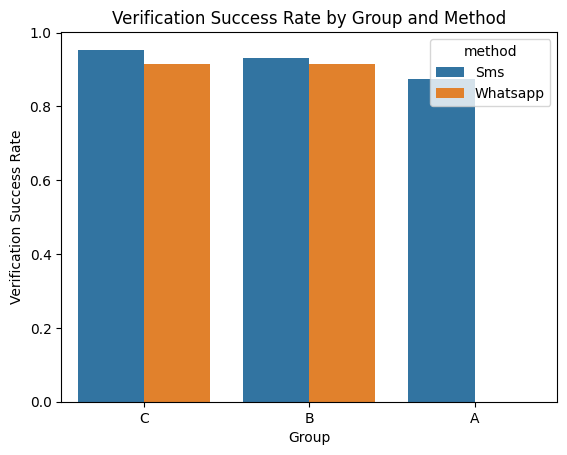

In [209]:
sns.barplot(data=data_02_01_1a, x='group', y='verification_success_rate', hue='method')
plt.title("Verification Success Rate by Group and Method")
plt.xlabel("Group")
plt.ylabel("Verification Success Rate")
plt.show()

Explanation:
- This bar plot shows the verification success rates across different groups (A, B, C) and methods (SMS, WhatsApp). It allows us to visually compare the performance of each method within each group.

- Insights:
    - Group A (SMS-only) has the lowest success rate.
    - Group C (with both WhatsApp and SMS) has the highest success rate, suggesting the benefit of offering multiple methods.
    - SMS generally performs better than WhatsApp, especially in Group C.

# 2. Verification Success Rate and Method Representation Percentage by Group (Dual Axis Plot)



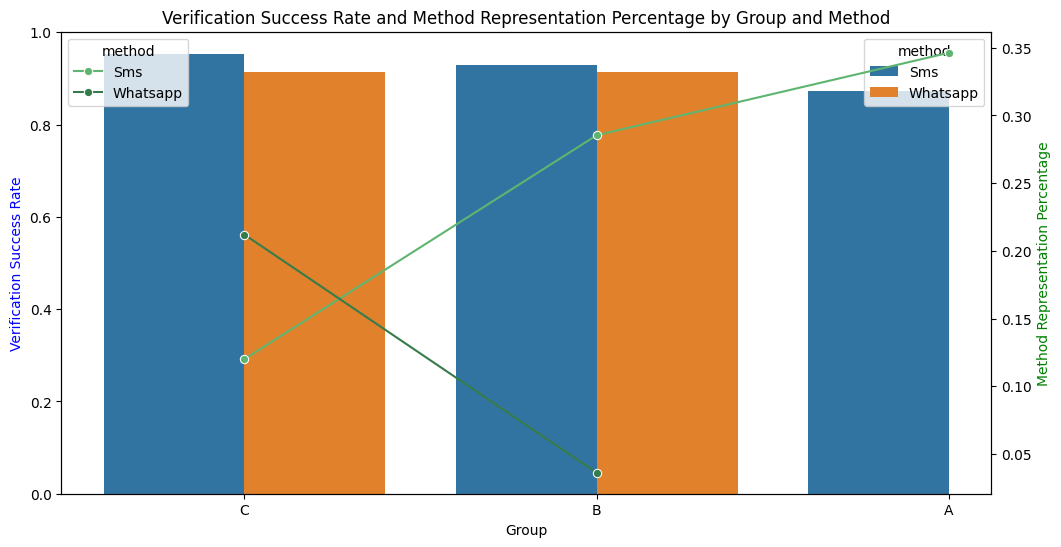

In [210]:
fig, ax1 = plt.subplots(figsize=(12, 6))                                                        # Create the figure and axis for the plot

sns.barplot(data=data_02_02, x='group', y='verification_success_rate', hue='method', ax=ax1)    # Bar plot for verification_success_rate, grouped by both 'group' and 'method'
ax1.set_xlabel("Group")
ax1.set_ylabel("Verification Success Rate", color='b')

ax2 = ax1.twinx()                                                                               # Add second y-axis for method_representation_percentage_within_group
sns.lineplot(data=data_02_02, x='group', y='method_representation_percentage_within_group', hue='method', 
             ax=ax2, marker='o', palette="Greens_d")
ax2.set_ylabel("Method Representation Percentage", color='g')

plt.title("Verification Success Rate and Method Representation Percentage by Group and Method") 
plt.show()

Explanation:
- This visualization uses a dual-axis plot to show both the verification success rate (bar plot) and the method representation percentage (line plot) for each group.

- Insights:
    - Bar Plot: Group C has the highest success rate, with SMS showing better results than WhatsApp.
    - Line Plot: Shows how the distribution of methods (SMS vs. WhatsApp) varies across groups. Group C has a higher share of WhatsApp (though SMS is still more successful), while Group B has a strong SMS preference.

# 3. Group Representation Percentage (Pie Chart)



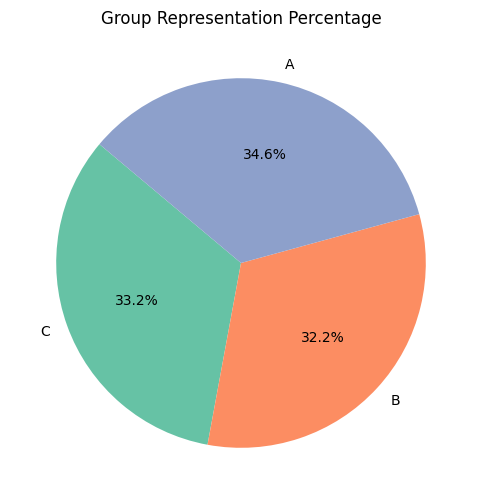

In [211]:
plt.figure(figsize=(6, 6))                                              # Pie chart for group representation
plt.pie(data_02_01_1b["group_representation_percentage"],
        labels=data_02_01_1b["group"],
        autopct='%1.1f%%',
        startangle=140,
        colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title("Group Representation Percentage")
plt.show()


Explanation:
- This pie chart shows the representation of each group (A, B, and C) within the dataset, showing how groups are distributed.

- Insights:
    -  Groups fairly balanced in terms of representation: Group A (34.6%), Group B (32.2%), and Group C (33.2%).
    - This suggests that any differences in success rates are not due to disproportionate group sizes.

# 4. Success Rate vs Method Share by Group (Scatter Plot)


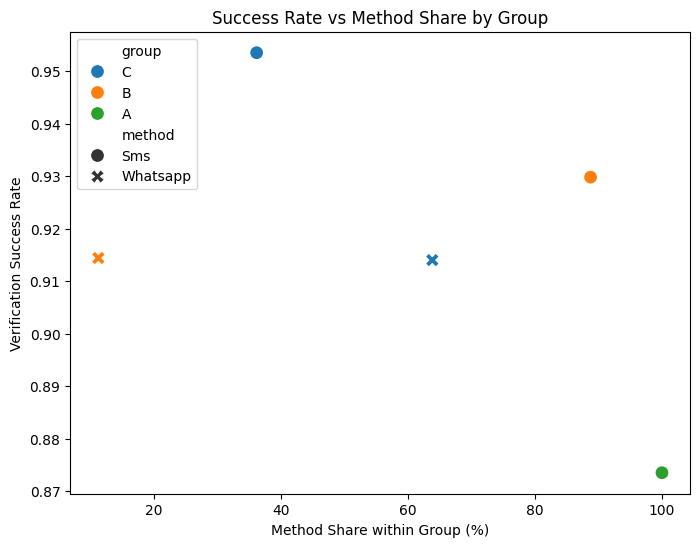

In [212]:
plt.figure(figsize=(8, 6))                                          # Plot Success Rate vs Method Share with 'group' as hue
sns.scatterplot(data=data_02_02, 
                x='method_share_within_group_percent', 
                y='verification_success_rate', 
                hue='group',  # Color points by 'group'
                style='method',  # Differentiate methods by marker style
                s=100)  # Marker size

plt.title('Success Rate vs Method Share by Group')                  
plt.xlabel('Method Share within Group (%)')
plt.ylabel('Verification Success Rate')

plt.show()                                                        


Explanation:
-  Scatter plot helps analyse how the share of each method (SMS and WhatsApp) within a group correlates with the overall verification success rate.

- Insights:
    - Group A (SMS-only): Has a lower success rate and a 100% share of SMS.
    - Group B (SMS > WhatsApp): SMS has a high success rate and accounts for most of the group interactions, with WhatsApp contributing less.
    - Group C (WhatsApp > SMS): WhatsApp has a higher share of the group, but SMS still outperforms WhatsApp in terms of success rate, especially with SMS having a high success rate when used.

# 5. Failure and Success Counts by Group and Method (Stacked Bar Plot)
To visualise the counts of success and failure for each method and group using a stacked bar plot. This will show how each method is performing within each group.

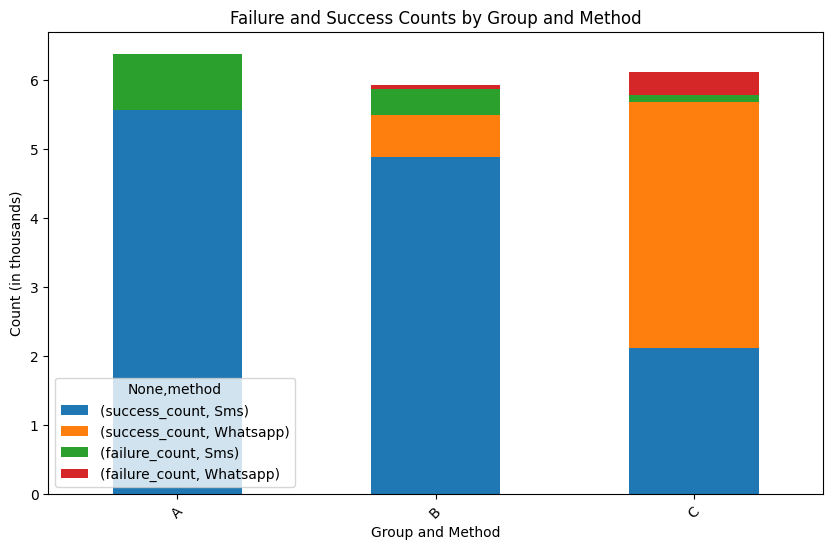

In [213]:
# Stacked bar plot for success and failure counts
data_03_01['success_count'] = data_03_01['success_count'] / 1000  # to scale down for better visualisation
data_03_01['failure_count'] = data_03_01['failure_count'] / 1000  # to scale down for better visualisation

# Create a stacked bar plot
data_03_01.set_index(['group', 'method'])[['success_count', 'failure_count']].unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Failure and Success Counts by Group and Method")
plt.xlabel("Group and Method")
plt.ylabel("Count (in thousands)")
plt.xticks(rotation=45)
plt.show()

# 6. Verification Success Rate and Total Cost by Country and Method (Dual Axis Plot)
- From 03_part_2.csv, you can compare the verification success rate and total cost across different countries and methods. A dual-axis plot can help visualize this relationship.

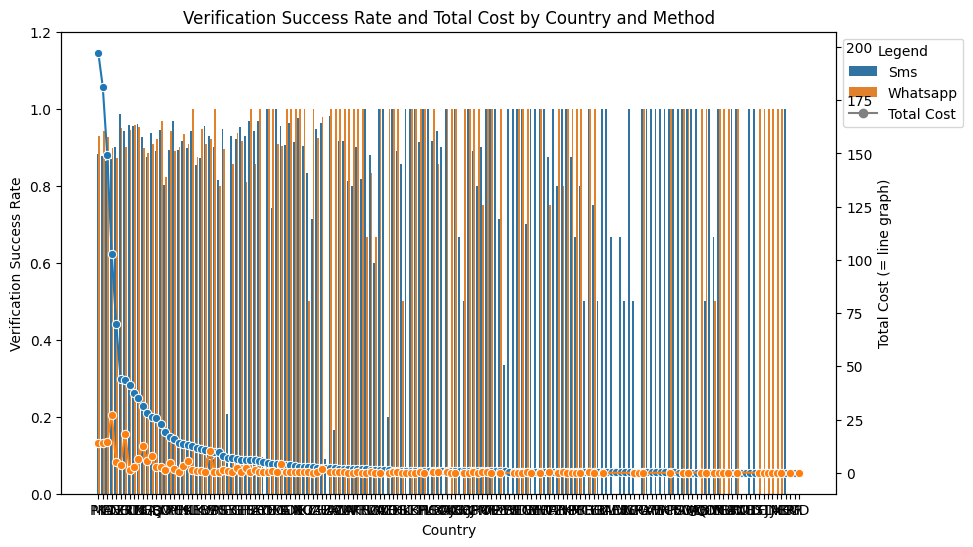

In [214]:
fig, ax1 = plt.subplots(figsize=(10, 6))                                                                                # Dual Axis Plot: Verification Success Rate and Total Cost

sns.barplot(data=data_03_02, x='country', y='verification_success_rate_by_country_and_method', ax=ax1, hue='method')    # Bar plot for verification success rate
ax1.set_xlabel("Country")
ax1.set_ylabel("Verification Success Rate")
ax1.set_ylim(0, 1.2)                                                                                                    # Adjust y-axis limit 

ax2 = ax1.twinx()                                                                                                       # Create the second y-axis for total cost
sns.lineplot(data=data_03_02, x='country', y='total_cost', ax=ax2, hue='method', marker='o', legend=False)
ax2.set_ylabel("Total Cost (= line graph)")

handles1, labels1 = ax1.get_legend_handles_labels()                                                                     # Legends: Get the handles and labels for the bar plot (verification success rate)

cost_legend = plt.Line2D([0], [0], color='grey', marker='o', linestyle='-', markersize=6, label='Total Cost')           # Custom legend for total cost (line plot)

ax1.legend(handles=handles1 + [cost_legend], labels=labels1 + ["Total Cost"], title="Legend", loc="upper left", bbox_to_anchor=(1, 1))  # Combine legends: success rate bars and total cost line

plt.title("Verification Success Rate and Total Cost by Country and Method")
plt.xticks(rotation=90)
plt.show()


# 7. Cost vs Verification Success Rate by Country (Scatter Plot)
A scatter plot to compare the verification success rate against the total cost by country to identify any correlation between the two metrics.

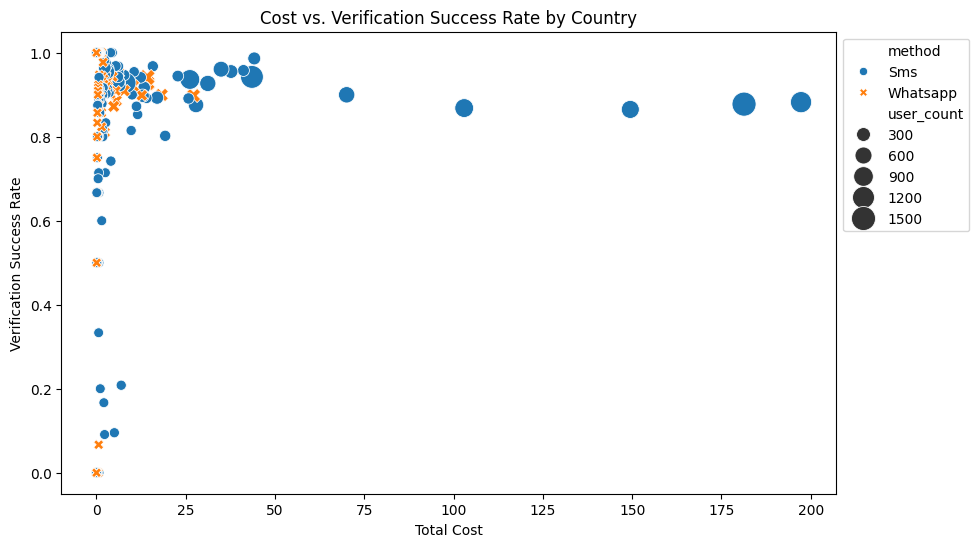

In [215]:
plt.figure(figsize=(10, 6))                                                         # Scatter plot for verification success rate vs total cost by country
sns.scatterplot(data=data_03_02,
                x='total_cost',
                y='verification_success_rate_by_country_and_method',
                hue='method', 
                style='method', 
                size='user_count',
                sizes=(50, 300))                                                    # Adjust marker size based on user count

plt.title("Cost vs. Verification Success Rate by Country")
plt.xlabel("Total Cost")
plt.ylabel("Verification Success Rate")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# 8. Verification Success Rate by Method Across Countries (Heatmap)
Heatmap to display the verification success rate by method across countries, for overview of how different methods perform in each country.

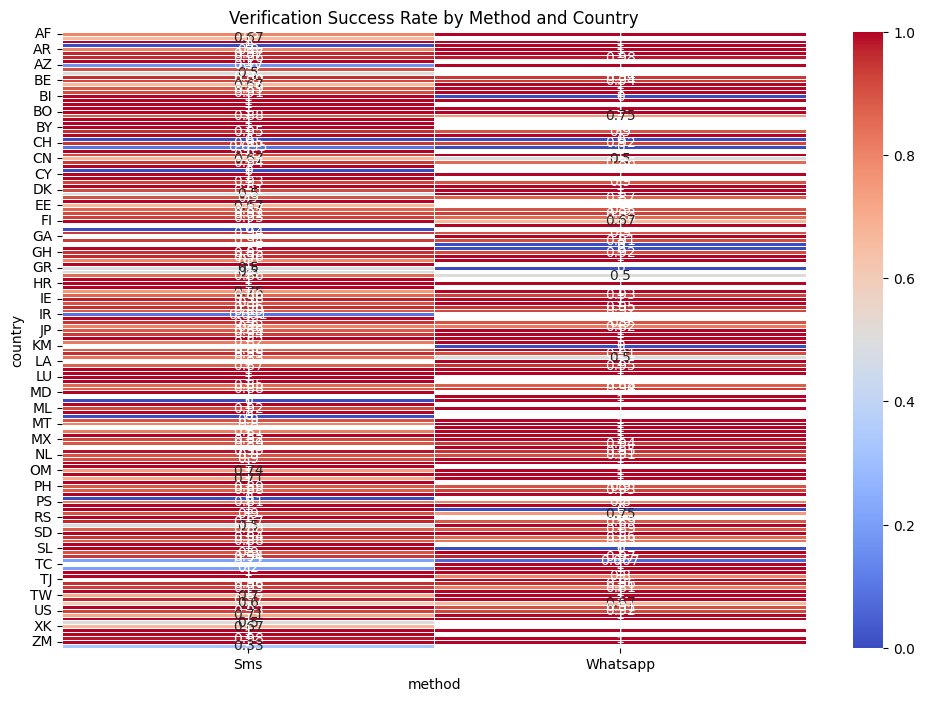

In [216]:
pivot_data = data_03_02.pivot(index='country', columns='method', values='verification_success_rate_by_country_and_method')  # Heatmap for verification success rate by method and country

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Verification Success Rate by Method and Country")
plt.show()

# 9. Total Cost by Country (Bar Plot)
Bar plot will display the total cost for each country, to identify which countries have the highest expenditure.

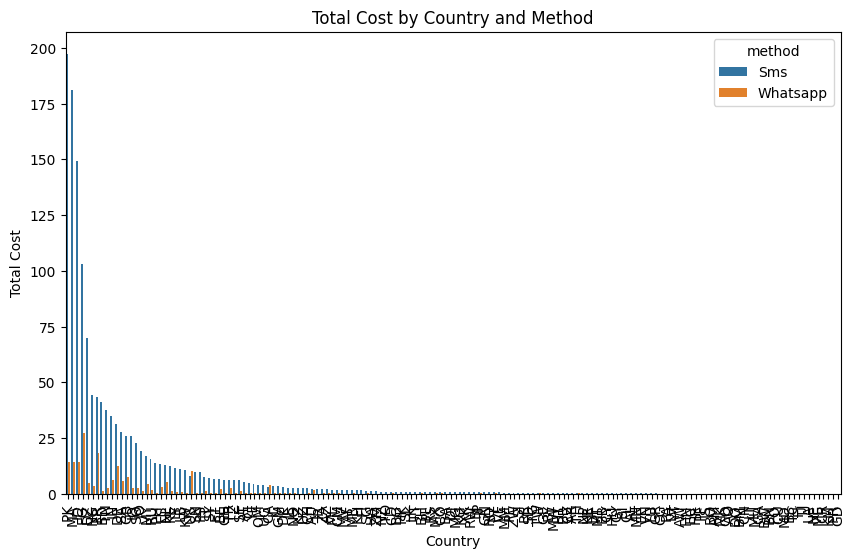

In [217]:
plt.figure(figsize=(10, 6))                                                                 # Bar plot for total cost by country
sns.barplot(data=data_03_02, x='country', y='total_cost', hue='method')
plt.title("Total Cost by Country and Method")
plt.xlabel("Country")
plt.ylabel("Total Cost")
plt.xticks(rotation=90)
plt.show()

# 10. Bar Plot: Method Counts by Age Bracket and Group
Bar plot to show the method counts for each age bracket, broken down by group and method.

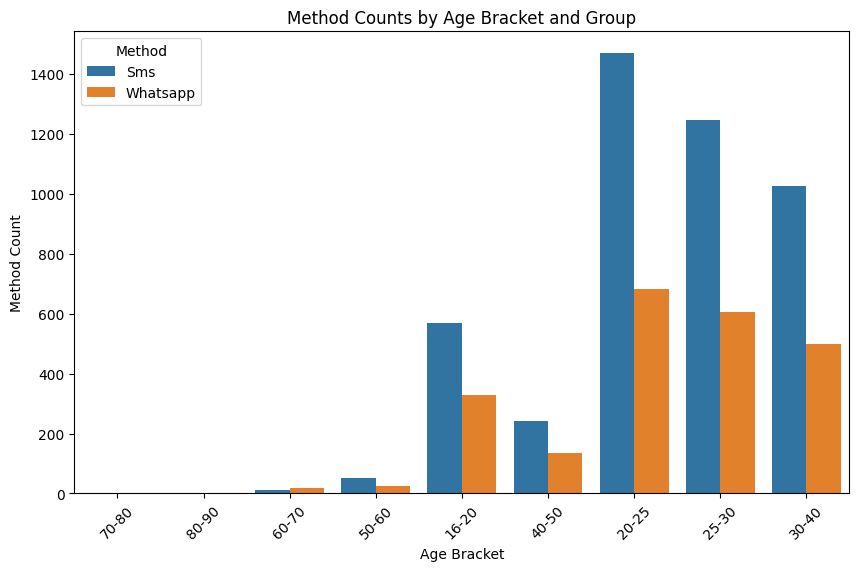

In [223]:
plt.figure(figsize=(10, 6))                                                                                 # Bar plot for method count by age bracket and group, broken down by method
sns.barplot(data=data_04_01, x='age_bracket', y='method_count', hue='method', dodge=True, errorbar=None)

plt.title("Method Counts by Age Bracket and Group")
plt.xlabel("Age Bracket")
plt.ylabel("Method Count")
plt.xticks(rotation=45)
plt.legend(title="Method", loc='upper left')
plt.show()


This bar plot visualises the method counts for each age bracket, with separate bars for SMS and WhatsApp. The height of each bar represents the count of users in that age bracket using each method.

# 11. Heatmap: Failure Rates by Method and Age Bracket
Heatmap to show the failure rates by method and age bracket to visualise where failure rates are higher and compare across methods.

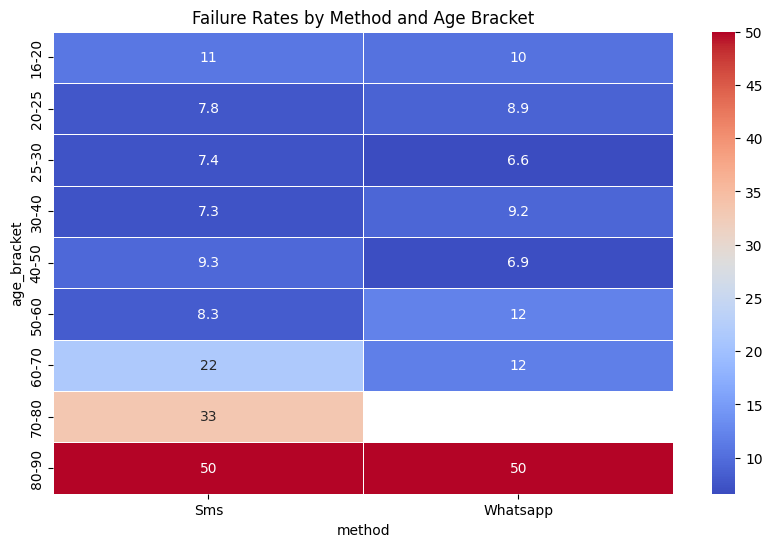

In [219]:
grouped_failure_rate = data_04_01.groupby(['age_bracket', 'method'], as_index=False)['relative_failure_count'].mean()       # Grouping data by age_bracket and method, and calculating the average relative_failure_count

pivot_failure_rate = grouped_failure_rate.pivot(index='age_bracket', columns='method', values='relative_failure_count')     # Pivot the data for failure rate by method and age bracket

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_failure_rate, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding title
plt.title("Failure Rates by Method and Age Bracket")
plt.show()


- Explanation:
    - groupby(): Aggregates the data by age_bracket and method, calculating the mean of relative_failure_count for each group.
    - pivot(): Converts the data into a matrix form for the heatmap, where the rows are age_bracket, the columns are method, and the values are the aggregated relative_failure_count.  

# 12. Pie Chart: Method Share by Group
To illustrate the proportion of each method (SMS vs WhatsApp) used by each group, a pie chart shall be used for each group.

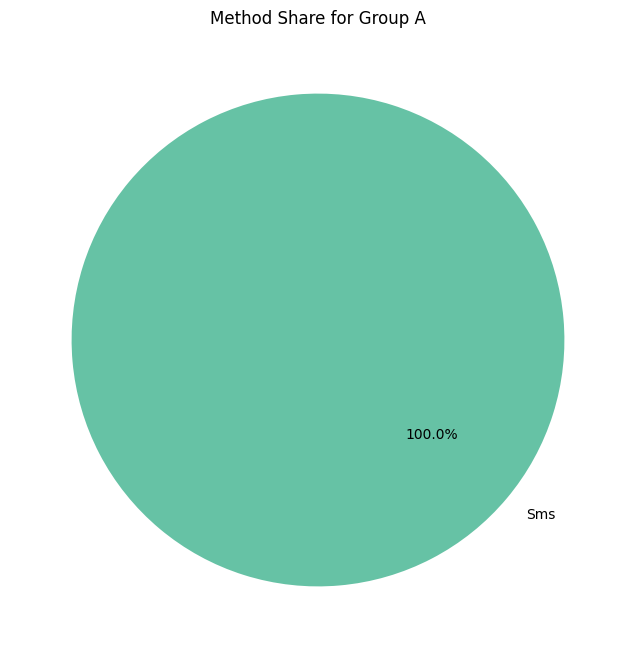

In [220]:
plt.figure(figsize=(8, 8))                                                                              # Pie chart for method share by group
group_method_share = data_04_01.groupby(['group', 'method'])['method_count'].sum().reset_index()

group_data = group_method_share[group_method_share['group'] == 'A']                                  
plt.pie(group_data['method_count'], 
        labels=group_data['method'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#66c2a5', '#fc8d62'])
plt.title("Method Share for Group A")
plt.show()


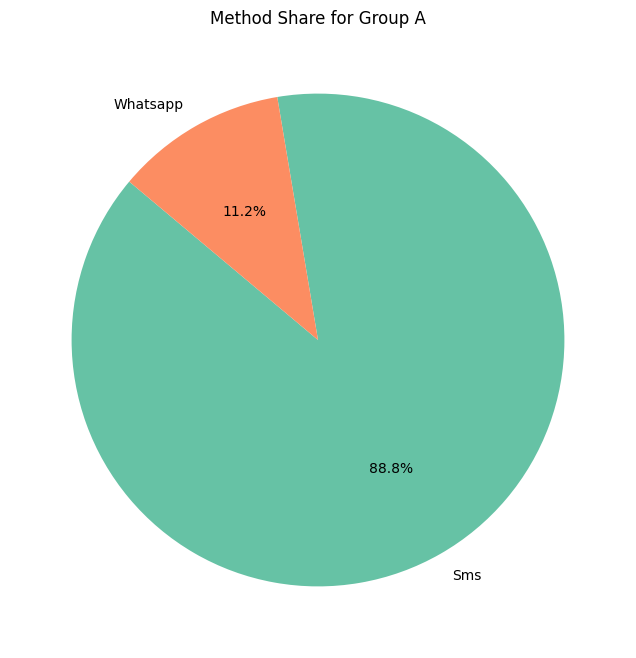

In [221]:
plt.figure(figsize=(8, 8))
group_method_share = data_04_01.groupby(['group', 'method'])['method_count'].sum().reset_index()        # Pie chart for method share by group


group_data = group_method_share[group_method_share['group'] == 'B']
plt.pie(group_data['method_count'], 
        labels=group_data['method'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#66c2a5', '#fc8d62'])
plt.title("Method Share for Group A")
plt.show()

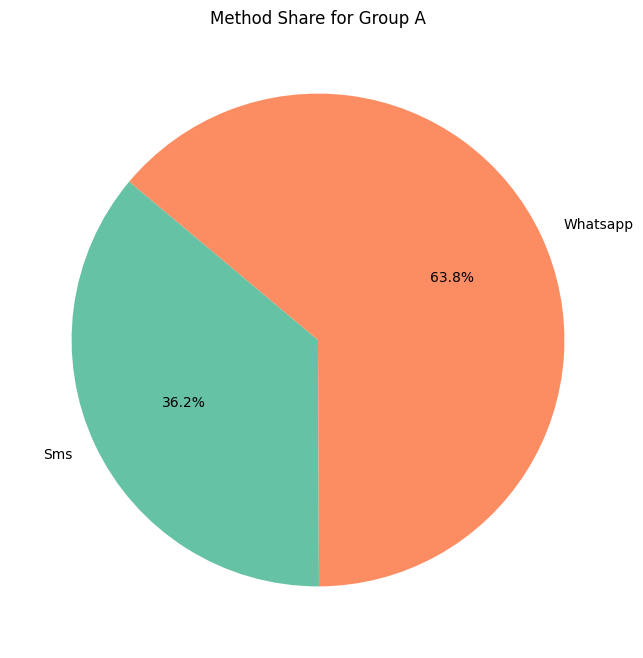

In [222]:
plt.figure(figsize=(8, 8))                                                                              # Pie chart for method share by group
group_method_share = data_04_01.groupby(['group', 'method'])['method_count'].sum().reset_index()

group_data = group_method_share[group_method_share['group'] == 'C']                                    
plt.pie(group_data['method_count'], 
        labels=group_data['method'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#66c2a5', '#fc8d62'])
plt.title("Method Share for Group A")
plt.show()